In [1]:
# Events detection

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, '../src/')

from events_detection import *

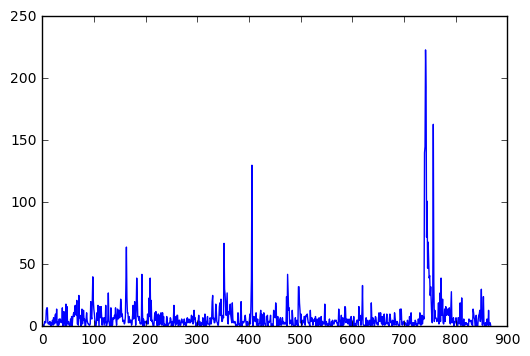

In [4]:
data = np.loadtxt('../results/search_seisme.txt')
plt.plot(data)

/home/jonathan/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


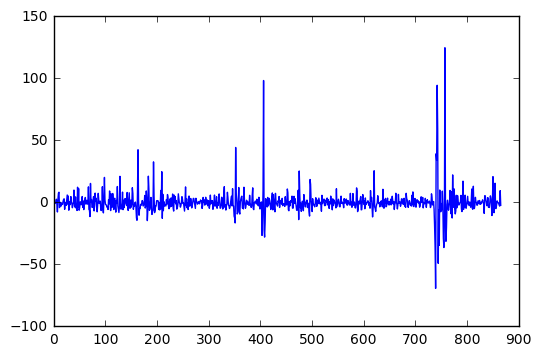

In [5]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(data, freq=7)
plt.plot(res.resid)

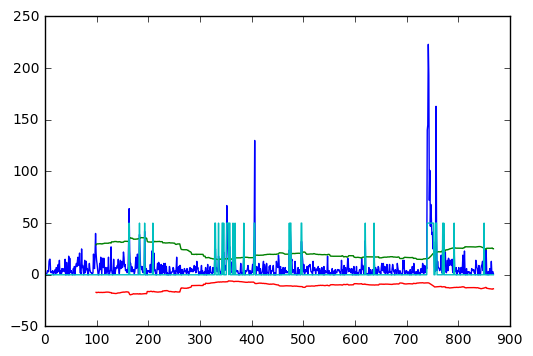

In [6]:
lag = 100
thresh = 3.5
influence = 0.01

signal, avg, std = peaks_detection(data, lag=lag, thresh=thresh, influence=influence)

plt.plot(data)
plt.plot(avg+std*thresh)
plt.plot(avg-std*thresh)
plt.plot(signal*50)
#plt.xlim((700,800))

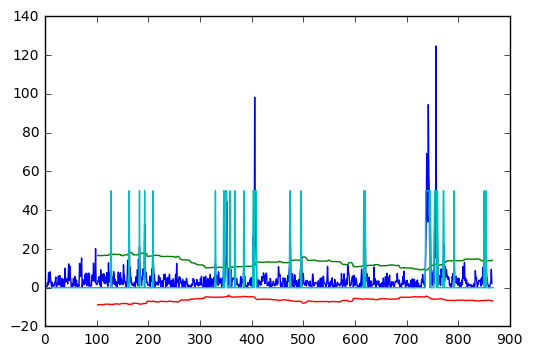

In [7]:
signal, avg, std = peaks_detection(np.abs(res.resid), lag=lag, thresh=thresh, influence=influence)

plt.plot(abs(res.resid))
plt.plot(avg+std*thresh)
plt.plot(avg-std*thresh)
plt.plot(abs(signal*50))
#plt.xlim((700,800))

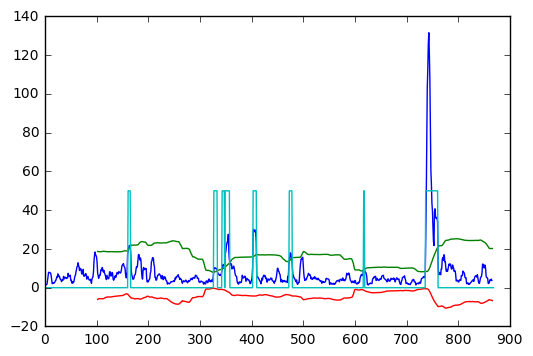

In [8]:
signal, avg, std = peaks_detection(res.trend, lag=lag, thresh=thresh, influence=influence)

plt.plot(res.trend)
plt.plot(avg+std*thresh)
plt.plot(avg-std*thresh)
plt.plot(abs(signal*50))
#plt.xlim((700,800))